<a href="https://colab.research.google.com/github/javed163/NLP-/blob/main/day_10_fakenewsclassifier_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')

In [63]:
df.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [64]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [65]:
df.shape

(20800, 5)

In [66]:
df = df.dropna()

In [67]:
df.shape

(18285, 5)

In [68]:
x = df.drop('label',axis = 1)

In [69]:
y = df['label']

In [71]:
x.shape

(18285, 4)

In [72]:
y.shape

(18285,)

In [77]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [78]:
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding, LSTM

In [79]:
# vocabulary size
voc_size = 5000

# ohe hot representation

In [80]:
messages = x.copy()

In [82]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [83]:
messages

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [86]:
# messages.reset_index(inplace=True)

In [87]:
messages.head(3)

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."


In [89]:
import nltk
import re

from nltk.corpus import stopwords

In [90]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
# data preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [93]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [95]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [94]:
one_hot_rep = [one_hot(words, voc_size) for words in corpus]
print(one_hot_rep)

[[1395, 3071, 3164, 4330, 685, 4460, 2873, 3416, 4361, 2739], [1575, 4386, 4649, 30, 2277, 3246, 2508], [4900, 297, 3110, 356], [447, 1466, 1578, 1741, 2182, 1163], [2510, 2277, 2988, 1541, 3668, 3886, 2277, 4134, 3135, 3567], [105, 4151, 3316, 3743, 128, 3570, 748, 3117, 4612, 4741, 3672, 4667, 2380, 3379, 2508], [1113, 2161, 1479, 2452, 2098, 4262, 4965, 4612, 2420, 2608, 395], [4758, 972, 968, 4736, 4047, 2432, 3570, 3037, 2420, 2608, 395], [472, 2944, 2391, 4092, 1122, 2779, 3340, 1212, 3570, 4643], [3553, 308, 4230, 4047, 2997, 2535, 4876, 2569], [2351, 4630, 3465, 4021, 4227, 2989, 47, 2809, 2355, 2177, 3689], [1741, 1604, 685, 2779, 3570, 4047], [1699, 3325, 4874, 965, 264, 539, 1232, 3155, 719], [2616, 632, 2898, 1652, 942, 2027, 863, 2420, 2608, 395], [3713, 1706, 4858, 3891, 2801, 2420, 2608, 395], [2019, 2483, 4853, 2595, 1561, 931, 3279, 3998, 2705, 1454], [4677, 4035, 4386], [2928, 2060, 1932, 1967, 3570, 1145, 1824, 2508], [1293, 308, 4649, 1673, 4844, 2243, 1722, 2178, 3

In [96]:
one_hot_rep[1]

[1575, 4386, 4649, 30, 2277, 3246, 2508]

# Embedding layer representation

In [99]:
sent_len = 20
embedded_docs = pad_sequences(one_hot_rep, padding = 'pre', maxlen=sent_len)
print(embedded_docs)

[[   0    0    0 ... 3416 4361 2739]
 [   0    0    0 ... 2277 3246 2508]
 [   0    0    0 ...  297 3110  356]
 ...
 [   0    0    0 ... 2420 2608  395]
 [   0    0    0 ...  109   62 1339]
 [   0    0    0 ... 1817   80 2873]]


In [101]:
embedded_docs[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 1575, 4386, 4649,   30, 2277, 3246, 2508], dtype=int32)

In [102]:
# model
embedding_vector_features = 40 # features representation
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_len))
model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuary'])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [104]:
x_final = np.array(embedded_docs)
y_final = np.array(y)

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.3, random_state = 42)

In [106]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 64)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7858 - loss: 0.4158 - val_accuracy: 0.9167 - val_loss: 0.1911
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9477 - loss: 0.1362 - val_accuracy: 0.9172 - val_loss: 0.2207
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9658 - loss: 0.1001 - val_accuracy: 0.9189 - val_loss: 0.2235
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9795 - loss: 0.0604 - val_accuracy: 0.9127 - val_loss: 0.2658
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.9904 - loss: 0.0340 - val_accuracy: 0.9079 - val_loss: 0.2990
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9931 - loss: 0.0238 - val_accuracy: 0.9123 - val_loss: 0.3473
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9966 - loss: 0.0127 - val_accuracy: 0.9131 - val_loss: 0.3715
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.9979 - loss: 0.0096 - 

# performance metrics

In [108]:
y_pred = model.predict(x_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [109]:
y_pred = np.where(y_pred > 0.5, 1,0)

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [114]:
confusion_matrix(y_test, y_pred)

array([[2811,  296],
       [ 186, 2193]])

In [115]:
accuracy_score(y_test, y_pred)

0.912139992708713

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3107
           1       0.88      0.92      0.90      2379

    accuracy                           0.91      5486
   macro avg       0.91      0.91      0.91      5486
weighted avg       0.91      0.91      0.91      5486



In [117]:


from sklearn.metrics import roc_auc_score

# Assuming y_pred contains probabilities
y_pred_prob = model.predict(x_test)

auc_roc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {auc_roc}")


172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
AUC-ROC: 0.958040549800563


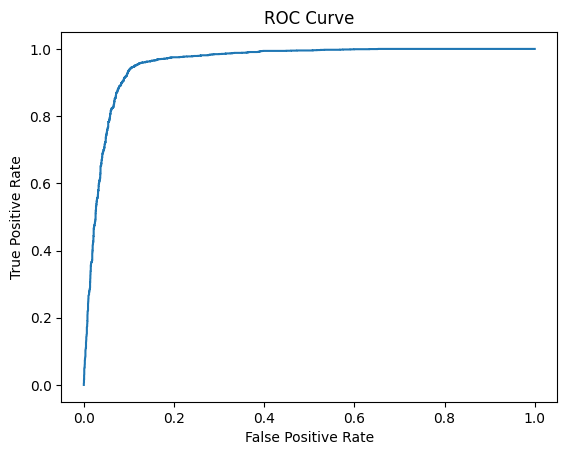

In [118]:
# prompt: analyze the auc roc curve

import matplotlib.pyplot as plt
# Assuming y_pred_prob contains probabilities
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
